# Case Study 2 : Analyzing data from MovieLens
** Due Date: March 5, 2016 5:59PM**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [18]:
from IPython.lib.display import YouTubeVideo

In [19]:
YouTubeVideo('6O43gOxtaWo', start=0)

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Shaowei Gong
    
    Houjue Wang
    
    William Grudzinski

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6 Pg 171-172,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to Chapter 1 of Python for Data Analysis book above.

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [20]:
import pandas as pd

#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table('C:\Users\Shaowei\Desktop\DS501\users.dat', sep='::', header=None,names=unames,engine='python')

In [21]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(r'C:\Users\Shaowei\Desktop\DS501\ratings.dat', sep='::', header=None,names=rnames,engine='python')

In [22]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('C:\Users\Shaowei\Desktop\DS501\movies.dat', sep='::', header=None,names=mnames,engine='python')

In [23]:
data = pd.merge(pd.merge(ratings, users), movies)

In [24]:
store = pd.HDFStore('C:\Users\Shaowei\Desktop\DS501\mydata.h5')

In [25]:
store['obj1'] = data

In [26]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: C:\Users\Shaowei\Desktop\DS501\mydata.h5
/obj1            frame        (shape->[1000209,10])

In [27]:
 ratings_by_id = data.groupby('movie_id').mean()

In [28]:
ratings_by_id.head()

,user_id,rating,timestamp,age,occupation
movie_id,,,,,
1,3053.819933,4.146846,9.705586e+08,27.700530,8.067886
2,3027.977175,3.201141,9.717322e+08,27.800285,7.680456
3,2632.156904,3.016736,9.734544e+08,29.276151,7.826360
4,3268.841176,2.729412,9.716206e+08,27.788235,6.752941
5,3143.152027,3.006757,9.718301e+08,27.425676,7.506757


In [29]:
len(ratings_by_id.loc[ratings_by_id['rating'] >= 4.5])

29

In [30]:
data_F=data.loc[data['gender']=='F']

In [31]:
data_F_mean=data_F.groupby('movie_id').mean()

In [32]:
len(data_F_mean.loc[data_F_mean['rating'] >= 4.5])

70

In [33]:
data_M=data.loc[data['gender']=='M']
data_M_mean=data_M.groupby('movie_id').mean()
len(data_M_mean.loc[data_M_mean['rating'] >= 4.5])

29

In [34]:
data_M.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama


In [35]:
data_M_30=data_M.loc[data_M['age']>30]

In [36]:
data_M_30_median=data_M.groupby('movie_id').median()

In [37]:
len(data_M_30_median.loc[data_M_30_median['rating'] >= 4.5])

93

In [38]:
data_F_30=data_F.loc[data_F['age']>30]
data_F_30_median=data_F.groupby('movie_id').median()
len(data_F_30_median.loc[data_F_30_median['rating'] >= 4.5])

161

In [39]:
# Defination of most popular: have the most reviews
popularMovie=data.groupby('movie_id').size()

In [40]:
movieSort=popularMovie.sort_values(ascending=False)

In [93]:
movieSort[:10]

movie_id
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
dtype: int64

In [42]:
# Women are more easy to please than Men


In [43]:
data_F.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
19,59,1193,4,977934292,F,50,1,55413,One Flew Over the Cuckoo's Nest (1975),Drama


In [44]:
data_F['rating'].mean()

3.6203660120110372

In [45]:
data_M['rating'].mean()

3.5688785290984373

In [46]:
data_F['rating'].median()

4.0

In [47]:
data_M['rating'].median()

4.0

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [48]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

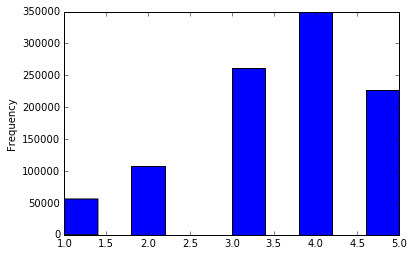

In [50]:
plt.figure()
data['rating'].plot.hist()
plt.show()

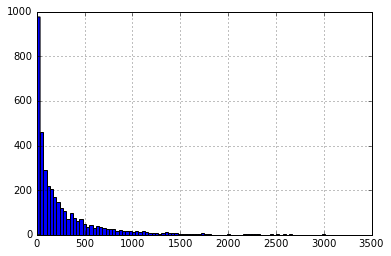

In [51]:
data.groupby('movie_id').size().hist(bins=100)
plt.show()

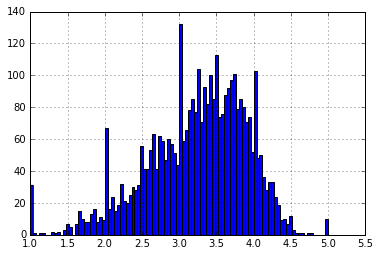

In [52]:
ratings_by_id['rating'].hist(bins=100)
plt.show()

In [53]:
data100 = data.groupby('movie_id').size()

In [54]:
active= data100.index[data100 >= 100]

In [55]:
meanrating=data.pivot_table(values='rating',index='movie_id')

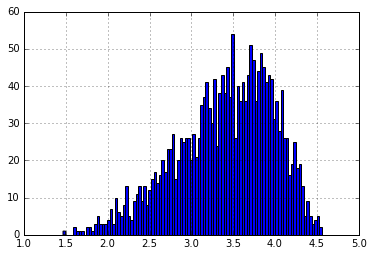

In [56]:
meanrating[active].hist(bins=100)
plt.show()

In [57]:
# What do you observe about the tails of the histogram where you use all the movies versus the one where you
# only use movies rated more than 100 times?

# Histogram of movies rated more than 100 times has much more thin tail compared with histogram of all the movies.

# Which highly rated movies would you trust are actually good? Those rated more than 100 times or those rated less 
# than 100 times?

# For me, I would like to trust movies reted more than 100 times. Because bigger sample can represent the populatin better. 

In [58]:
# Make some conjectures about the distribution of ratings? Support your answers with data!
# I conject that the rate of Female has more extreme rates than Male.

# In order to eliminate invalid rate, we plot rate histograms of Female and Male with more than 100 rates seperately .  
# We find that histogram of female has thicker tails than histogram of male and lower peak. This indicates that Female has more
# extreme rates. 

In [59]:
meanrating_gender=data.pivot_table(values='rating',index='movie_id',columns='gender')

In [60]:
meanrating_gender.head()

gender,F,M
movie_id,,
1,4.187817,4.130552
2,3.278409,3.175238
3,3.073529,2.994152
4,2.976471,2.482353
5,3.212963,2.888298


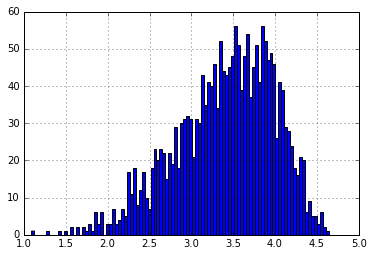

In [61]:
meanrating_gender['F'][active].hist(bins=100)

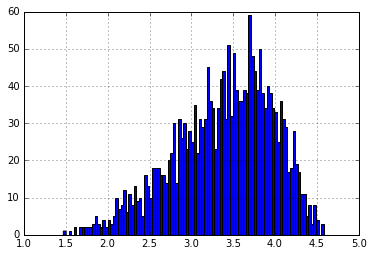

In [62]:
meanrating_gender['M'][active].hist(bins=100)

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [63]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

In [64]:
X=data.pivot_table('rating',index='movie_id',columns='gender',aggfunc='mean')

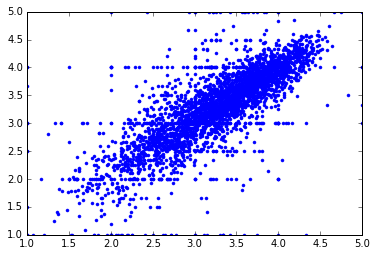

In [65]:
plt.plot(X['M'],X['F'],'.')

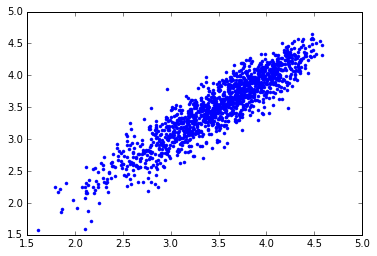

In [66]:
data200 = data.groupby('movie_id').size()
active_200= data200.index[data200 >= 200]
plt.plot(X['M'][active_200],X['F'][active_200],'.')

In [67]:
X.corr()

gender,F,M
gender,,
F,1.00000,0.76319
M,0.76319,1.00000


In [68]:
# Conjecture under what circumstances the rating given by one gender can be used to predict the rating 
# given by the other gender.

# For the movies rated more than 200 times, given the rating by one gender, we can predict the rating given by another gender.
# According to the correlation coefficent of rating between male and female for movies rated more than 200 times,
# their correlation coefficent is as high as 0.92, which indicates that male and female almost have the same behavior in matter 
# of movies rated more than 200 times. 

In [69]:
X_200=X.loc[active_200]

In [70]:
X_200.corr()

gender,F,M
gender,,
F,1.000000,0.918963
M,0.918963,1.000000


*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  Convince your boss that your conjecture is correct!

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

In [71]:
# (1)We collect from http://grouplens.org/datasets/movielens/ and download the MovieLens 1M Dataset.
#  This dateset include 3 tables: users(user_id, gender, age, occupation, zip), ratings(user_id, movie_id, rating, timestamp),
#  movies(movie_id, title, genres). For the convenience of our analysis, we merge these three datasets, and get a new dataset
#  called "data".

In [73]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [74]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [75]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [76]:
data.groupby('zip').count()

,user_id,movie_id,rating,timestamp,gender,age,occupation,title,genres
zip,,,,,,,,,
00231,78,78,78,78,78,78,78,78,78
00606,195,195,195,195,195,195,195,195,195
00681,69,69,69,69,69,69,69,69,69
00693,139,139,139,139,139,139,139,139,139
00918,146,146,146,146,146,146,146,146,146
00926,46,46,46,46,46,46,46,46,46
00961,159,159,159,159,159,159,159,159,159
01002,768,768,768,768,768,768,768,768,768
01003,903,903,903,903,903,903,903,903,903


In [78]:
import pandas as pd
zipcode= pd.read_csv(r'C:\Users\Shaowei\Desktop\DS501\zipcode.csv',engine='python')

In [79]:
zipcode

,zip,city,state,latitude,longitude,timezone,dst
0,210,Portsmouth,NH,43.005895,-71.013202,-5,1
1,211,Portsmouth,NH,43.005895,-71.013202,-5,1
2,212,Portsmouth,NH,43.005895,-71.013202,-5,1
3,213,Portsmouth,NH,43.005895,-71.013202,-5,1
4,214,Portsmouth,NH,43.005895,-71.013202,-5,1
5,215,Portsmouth,NH,43.005895,-71.013202,-5,1
6,501,Holtsville,NY,40.922326,-72.637078,-5,1
7,544,Holtsville,NY,40.922326,-72.637078,-5,1
8,601,Adjuntas,PR,18.180103,-66.749470,-4,0
9,602,Aguada,PR,18.363285,-67.180240,-4,0


In [80]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [81]:
zipdata=pd.merge(data,zipcode)

In [82]:
data.dtypes

user_id        int64
movie_id       int64
rating         int64
timestamp      int64
gender        object
age            int64
occupation     int64
zip           object
title         object
genres        object
dtype: object

In [83]:
zipcode.dtypes

zip            int64
city          object
state         object
latitude     float64
longitude    float64
timezone       int64
dst            int64
dtype: object

In [84]:
zipdata= data.convert_objects(convert_numeric=True)


C:\Users\Shaowei\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [85]:
zipdata.dtypes

user_id         int64
movie_id        int64
rating          int64
timestamp       int64
gender         object
age             int64
occupation      int64
zip           float64
title          object
genres         object
dtype: object

In [86]:
final=pd.merge(zipdata,zipcode)

In [87]:
la=list(final['latitude'])

In [88]:
lo=list(final['longitude'])

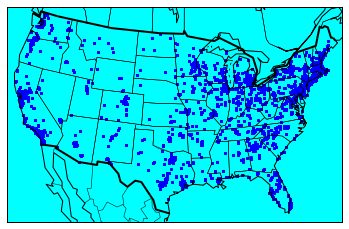

In [89]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawcoastlines()


m.drawmapboundary(fill_color='aqua')
m.drawcountries(linewidth=2)
m.drawstates(color='#000000')
lon = np.array(lo)
lat = np.array(la)
x,y = m(lon,lat)
m.scatter(x,y,1,marker='o',color='b')

plt.show()

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501] Case study 2".

In [ ]:
store = HDFStore('store.h5')